### Caso de aplicación con TF-IDF y Machine Learning
# Manifesto Project

Conjunto de textos políticos recolectados a lo largo de 2 décadas de diferentes partes del mundo (incluido latinoamérica). Los textos políticos han sido anotados por personas especializadas en el campo y siguiendo un entrenamiento previo para garantizar la calidad de las anotaciones.
[Link del dataset original](https://manifestoproject.wzb.eu/)

La versión que vamos a utilizar consiste en 56 categorías específicas agrupadas en 7 dominios políticos: 
- external relations
- freedom and democracy 
- political system 
- economy
- welfare and quality of life 
- social groups

Concretamente, nosotros nos centraremos en la clasificacion de textos politicos en el idioma español. El dataset de este notebook contiene los textos extraidos de cada manifiesto y con preprocesamiento simple de modo que solo nos vamos a centrar en la parte de clasificacion.

#### Metricas
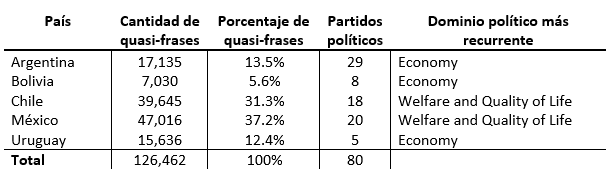

#### Clases
- class 0 = ['Economy']
- class 1 = ['External Relations']
- class 2 = ['Fabric of Society']
- class 3 = ['Freedom and Democracy']
- class 4 = ['Political System']
- class 5 = ['Social Groups']
- class 6 = ['Welfare and Quality of Life']

Importamos las librerias que vamos a utilizar

In [1]:
import numpy as np                                           # operaciones varias 
import pandas as pd                                          # manejo del dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # vectorizacion
from sklearn.model_selection import train_test_split         # division del dataset
from sklearn.svm import SVC                                  # clasificador
# evaluacion del modelo de clasificacion
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Cargamos el dataset

In [2]:
df = pd.read_pickle('data/manifesto_uncased.df')
df

,phrase,prev_phrase,party,label
0,la cual debe buscar la plena realización de to...,son principios liminares de toda democracia cr...,United for a New Alternative,2
1,"la importancia de la familia y su promoción, i...",la cual debe buscar la plena realización de to...,United for a New Alternative,2
2,"entendido éste como el conjunto de valores, no...","la importancia de la familia y su promoción, i...",United for a New Alternative,2
3,respetando y garantizando los derechos de las ...,"entendido éste como el conjunto de valores, no...",United for a New Alternative,3
4,la protección de los derechos humanos desde un...,respetando y garantizando los derechos de las ...,United for a New Alternative,3
...,...,...,...,...
126452,gestionar recursos públicos para la instalació...,con la finalidad de reducir la vulnerabilidad ...,Social Encounter Party,6
126453,gestionar recursos federales que permitan adqu...,gestionar recursos públicos para la instalació...,Social Encounter Party,6
126454,la instalación de estaciones automáticas de mo...,gestionar recursos federales que permitan adqu...,Social Encounter Party,6
126455,"esto a su vez, permitiría organizar campañas d...",la instalación de estaciones automáticas de mo...,Social Encounter Party,6


Solo usaremos la columna phrase y la columna label, por lo que lo demas lo podemos descartar actualizando nuestro dataframe

In [3]:
df = df[['phrase', 'label']]
df

,phrase,label
0,la cual debe buscar la plena realización de to...,2
1,"la importancia de la familia y su promoción, i...",2
2,"entendido éste como el conjunto de valores, no...",2
3,respetando y garantizando los derechos de las ...,3
4,la protección de los derechos humanos desde un...,3
...,...,...
126452,gestionar recursos públicos para la instalació...,6
126453,gestionar recursos federales que permitan adqu...,6
126454,la instalación de estaciones automáticas de mo...,6
126455,"esto a su vez, permitiría organizar campañas d...",6


### Dividimos en train set y test set (80/20)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.phrase.to_numpy(), df.label.to_numpy(), test_size=0.20, random_state=2023)

In [5]:
X_train.shape

(101165,)

In [6]:
X_test.shape

(25292,)

In [7]:
y_train.shape

(101165,)

In [8]:
y_test.shape

(25292,)

<Axes: >

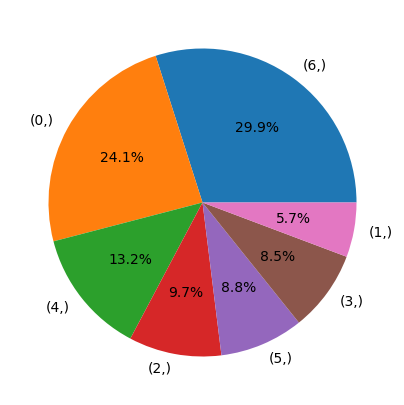

In [9]:
temp = pd.DataFrame(y_train, columns = ['train'])
temp.value_counts().plot.pie(figsize=(5, 5), autopct='%1.1f%%')

**(Opcional)** Vamos a reducir el dataset y utilizar solo los 10000 primeros registros por motivos de salvar recursos computacionales y tiempo

In [10]:
X_train = X_train[0:10000] 
X_test  = X_test[0:10000] 
y_train = y_train[0:10000] 
y_test  = y_test[0:10000] 

### Vectorizacion con TF-IDF

Creamos una instancia de TfidfVectorizer() y transformamos nuestro set de train en una matriz documento-termino

In [11]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [12]:
X_train.shape   # 49816 - tamaño de vocabulario

(10000, 16756)

In [13]:
X_train

<10000x16756 sparse matrix of type '<class 'numpy.float64'>'
	with 182343 stored elements in Compressed Sparse Row format>

Utilizamos la misma instacia de TF-IDF para transformar nuestro test set

In [14]:
X_test = vectorizer.transform(X_test)

In [15]:
X_test.shape

(10000, 16756)

### Utilizando Machine Learning para la clasificacion 

Instanciamos el modelo SVM para clasificacion

In [16]:
classifier = SVC(kernel="rbf")

In [17]:
classifier.fit(X_train, y_train)

SVC()

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 6, 6, ..., 6, 0, 6], dtype=int64)

In [19]:
y_pred.shape

(10000,)

### Evaluamos el modelo de clasificacion

In [20]:
print("Resultados de evaluacion")
print("-"*10)
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, y_pred)))
print("F1-Score Macro: {:0.4f}".format(f1_score(y_test, y_pred, average='macro')))

Resultados de evaluacion
----------
Accuracy: 0.5205
F1-Score Macro: 0.4362
